# Mini Project

## 자전거 수요량 예측 데이터 분석  
https://www.kaggle.com/c/bike-sharing-demand



### 1. 가설 설정
데이터 분석 전에 데이터 간의 연관성에 대한 임의의 가설 설정하기

### 2. 데이터 시각화 
4종류 이상의 시각화 기법을 사용하여 그래프 그리기
Seaborn 라이브러리 활용

### 3. 데이터 분석
각 그래프로부터 얻을 수 있는 의미 도출

### 4. 최초의 가설 검정
가설이 유의미한지 여부 판단하기

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 읽어드릴 파일 경로 : /dataset/bike_sharing_demand_train.csv
filepath = "./dataset/bike_sharing_demand_train.csv"
data = pd.read_csv(filepath)

In [3]:
print(data.head())
print(data.info())

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-n

## 날짜 데이터 파싱

In [4]:
data['datetime'] = data['datetime'].astype('datetime64')

In [5]:
data['year']=data['datetime'].dt.year
data['month']=data['datetime'].dt.month
data['day']=data['datetime'].dt.day
data['hour']=data['datetime'].dt.hour
data['minute']=data['datetime'].dt.minute
data['second']=data['datetime'].dt.second

In [6]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


In [7]:
map1 = {
    1 : 'spring',
    2 : 'summer',
    3 : 'fall',
    4 : 'winter'
}
data1 = data
data1['season'] = data1['season'].map(map1)

In [8]:
data1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [9]:
data_season = data1.groupby(data1['season']).sum()

In [10]:
data_season

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
season,,,,,,,,,,,,,,,,
fall,96,1845,3735,78680.64,88933.960,175250,31453.7195,142718,497944,640662,5497431,21861,27334,31458,0,0
spring,71,1828,3826,33656.90,40904.975,151216,39314.9233,41605,270893,312498,5402909,5389,26776,31272,0,0
summer,48,1893,3889,62376.58,72826.520,166311,36637.5229,129672,458610,588282,5497429,13668,27336,31454,0,0
winter,96,1846,3991,45519.02,54843.790,180919,31928.0527,78140,465894,544034,5499441,30075,27333,31458,0,0


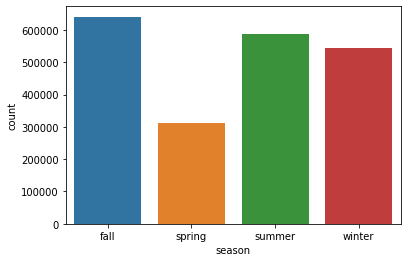

In [11]:
season_count = sns.barplot(x=data_season.index, y='count', data=data_season)

#### 계절별 사용량을 확인했을 때 여름 ~ 겨울은 큰 차이 없이 높은 사용량을 보이는 반면, 봄에 눈에 띄게 적은 사용량을 보인다

In [27]:
data_weather = data.groupby('weather').sum()

In [28]:
data_weather

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
weather,,,,,,,,,,,,,,,
1,204,4839,147846.82,172565.755,407907,92723.1626,289900,1186163,1476063,14466721,46599,71858,84390,0,0
2,92,1937,55587.80,65387.220,195831,34517.8506,87246,419914,507160,5700642,18795,28633,31035,0,0
3,15,635,16790.32,19544.905,69872,12087.2020,14983,87106,102089,1727835,5598,8279,10199,0,0
4,0,1,8.20,11.365,86,6.0032,6,158,164,2012,1,9,18,0,0


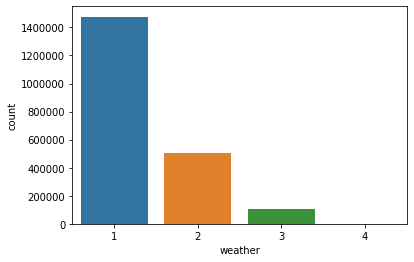

In [13]:
weather_count = sns.barplot(x=data_weather.index, y='count', data=data_weather)

##### 1 : Clear, Few clouds, Partly cloudy
##### 2 : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
##### 3 : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
##### 4 : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

#### 날씨가 좋을수록 사용량이 현저히 높으며, 강우나 빙판길 등의 상황에서 극도로 낮은 사용량을 보인다.

In [34]:
data_year = data1.groupby(data1['year']).sum()

In [35]:
data_year

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour,minute,second
year,,,,,,,,,,,,,,,
2011,144,3698,7734,107095.28,125557.720,343782,70074.7104,155817,626162,781979,35452,54126,62738,0,0
2012,167,3714,7707,113137.86,131951.525,329914,69259.5080,236318,1067179,1303497,35541,54653,62904,0,0


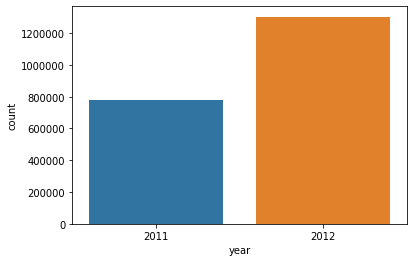

In [37]:
year_count = sns.barplot(x=data_year.index, y='count', data=data_year)

#### 2011년에 비해 2012년에 사용량이 눈에 띄게 증가하였다.

In [38]:
data_month = data1.groupby(data1['month']).sum()

In [39]:
data_month

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,day,hour,minute,second
month,,,,,,,,,,,,,,,
1,71,550,1238,8698.56,10676.580,49426,12891.3360,7252,72632,79884,1778177,8766,10370,0,0
2,0,638,1314,10630.48,13093.880,50723,12581.3002,9297,89816,99113,1812366,9021,10449,0,0
3,0,640,1274,14327.86,17134.515,51067,13842.2871,25056,108445,133501,1812366,8989,10453,0,0
4,48,597,1302,17015.00,20276.055,50629,14163.2104,39813,127589,167402,1828453,9096,10478,0,0
5,0,672,1393,20678.76,24288.725,62093,11212.0882,41285,158862,200147,1834488,9120,10488,0,0
6,0,624,1194,24682.82,28261.740,53589,11262.2243,48574,172159,220733,1834488,9120,10488,0,0
7,48,600,1145,28127.64,31829.160,53263,10050.1742,50947,163670,214617,1834488,9120,10488,0,0
8,0,672,1233,27119.86,30207.265,57466,10881.2355,45870,167646,213516,1834488,9120,10488,0,0
9,48,573,1357,23433.14,26897.535,64521,10522.3098,45901,166628,212529,1828455,9094,10482,0,0


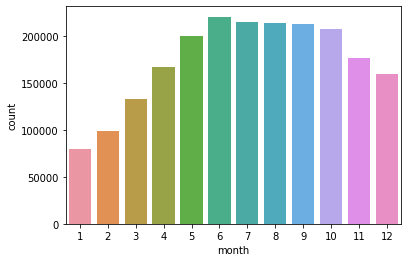

In [40]:
month_count = sns.barplot(x=data_month.index, y='count', data=data_month)

#### 대체적으로 기온이 높을 때 더 높은 사용량을 보인다.

In [42]:
data_hour = data1.groupby(data1['hour']).sum()

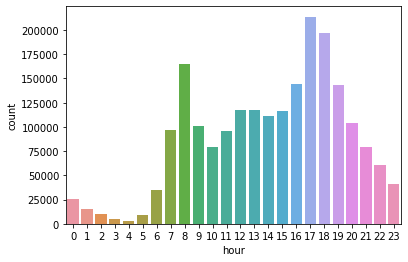

In [43]:
hour_count = sns.barplot(x=data_hour.index, y='count', data=data_hour)

#### 출퇴근 시간대에 높은 사용량을 보인다.